In [1]:
import sys, os
import numpy as np

#The line below is necesary to show Matplotlib's plots inside a Jupyter Notebook
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()


#add ../src to system path
parent_path = os.path.dirname(os.getcwd())
sys.path.append(os.path.join(parent_path,'src'))

#import DMD from ../src
from dmd import DMD
from utils import VideoIO

/home/rajat/Dropbox/projects/lowrank/data/a.mp4
(30, 144, 180)
(144, 180)


/home/rajat/Dropbox/projects/lowrank/src/dmd.py:58: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.coefficients = np.linalg.lstsq(self.modes, self.snapshots[:, 0])[0]


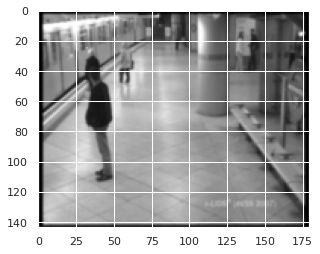

In [2]:
videofile = 'a.mp4'
videofile_path = os.path.join(parent_path, 'data', videofile)
print(videofile_path)

vid = VideoIO(videofile_path)
x = vid.stack_frames(495, 30)
print(x.shape)
print(x.shape[1:])

plt.imshow(x[0], cmap = 'gray')

algo = DMD()
algo.solve(x, 1/(vid.fps-1))

[7.01464531e-03 4.15789539e+00 4.15789539e+00 1.05359484e+01
 1.05359484e+01 1.51366236e+01 1.51366236e+01 2.16753689e+01
 2.16753689e+01 2.61262100e+01 2.61262100e+01 3.26394134e+01
 3.26394134e+01 3.85208933e+01 3.85208933e+01 4.35102880e+01
 4.35102880e+01 3.83069545e+01 3.83069545e+01 5.07550902e+01
 5.07550902e+01 5.55310861e+01 5.55310861e+01 6.24528082e+01
 6.24528082e+01 6.85665716e+01 6.85665716e+01 7.54309548e+01
 7.59402062e+01]
[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]


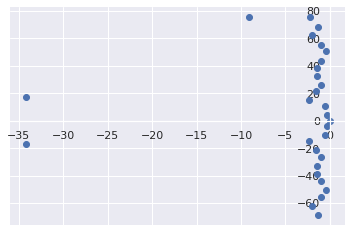

In [3]:
print(np.abs(algo.omegas))
mask = algo.create_mask()
print(mask)


ax = plt.gca()

ax.scatter(np.real(algo.omegas), np.imag(algo.omegas))
ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')


#plt.axvline(x = 0, color ="red", linestyle ="--")
#plt.axhline(y = 0, color ="red", linestyle ="--")
plt.show()

In [4]:
x_approx_lowrank = algo.evolve(mask = mask)

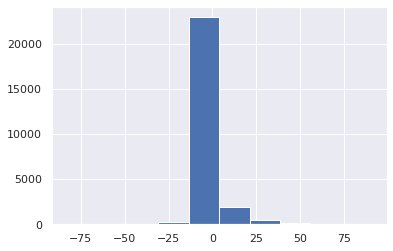

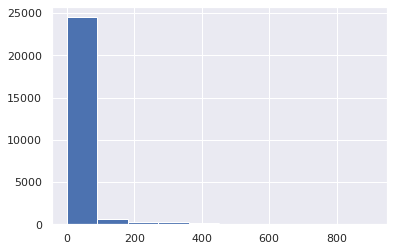

In [23]:
img_idx = 5

img = algo.snapshots[:, img_idx]
img_lowrank = np.real(x_approx_lowrank[:, img_idx])
img_sparse = img - img_lowrank

plt.hist(img_sparse)
plt.show()

# taking care of negative residuals 
img_sparse_copy = np.copy(img_sparse)
img_sparse_copy[img_sparse_copy > 0] = 0

img_sparse = img_sparse + np.abs(img_sparse_copy)
img_sparse = img_sparse*10
img_lowrank = img_lowrank + img_sparse_copy

plt.hist(img_sparse)
plt.show()

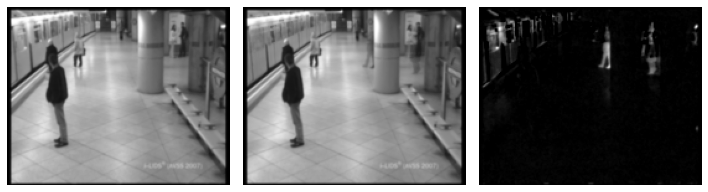

In [24]:
fig = plt.figure()  # create a figure object
fig.set_size_inches(10, 6.5)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
#ax4 = fig.add_subplot(224)

ax1.imshow(img.reshape(algo.dim), cmap='gray')
ax1.set_axis_off()
ax2.imshow(np.real(img_lowrank.reshape(algo.dim)), cmap='gray')
ax2.set_axis_off()
ax3.imshow(img_sparse.reshape(algo.dim), cmap='gray')
ax3.set_axis_off()
fig.tight_layout() 
